# Baseline Models

In [77]:
import math
import random

import numpy as np

import gensim

from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import GRU, LSTM, Activation, Dense, Dropout, Embedding
from tensorflow.keras.callbacks import History

import matplotlib.pyplot as plt

In [2]:
w2v_model = gensim.models.KeyedVectors.load("w2v.model", mmap='r')

In [3]:
vocab_size, emdedding_size = w2v_model.wv.vectors.shape
vocab_size, emdedding_size

(33831, 128)

In [4]:
x = np.load('data/x.npy')
y = np.load('data/y.npy')[:,0]

In [5]:
x.shape, y.shape

((17628, 133), (17628,))

In [6]:
# instantiate history to save losses
history = History()

## Baseline #1: GRU

In [7]:
gru = Sequential()

gru.add(Embedding(input_dim=vocab_size, output_dim=emdedding_size))
gru.add(GRU(128, input_shape=(vocab_size, emdedding_size), return_sequences=True))
gru.add(Dropout(0.3))
gru.add(GRU(128))
gru.add(Dense(vocab_size, activation='softmax'))

In [8]:
gru.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

In [9]:
filepath = "weights/gru.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks = [checkpoint]

In [10]:
gru_loss = gru.fit(x, y, validation_split=0.2, batch_size=64, epochs=20, callbacks=callbacks)

Train on 14102 samples, validate on 3526 samples
Epoch 1/20
14080/14102 [============================>.] - ETA: 0s - loss: 7.8340
Epoch 00001: val_loss improved from inf to 7.33138, saving model to weights/gru.hdf5
14102/14102 [==============================] - 160s 11ms/sample - loss: 7.8342 - val_loss: 7.3314
Epoch 2/20
14080/14102 [============================>.] - ETA: 0s - loss: 6.5751
Epoch 00002: val_loss improved from 7.33138 to 6.92182, saving model to weights/gru.hdf5
14102/14102 [==============================] - 158s 11ms/sample - loss: 6.5752 - val_loss: 6.9218
Epoch 3/20
14080/14102 [============================>.] - ETA: 0s - loss: 6.0885
Epoch 00003: val_loss improved from 6.92182 to 6.73195, saving model to weights/gru.hdf5
14102/14102 [==============================] - 160s 11ms/sample - loss: 6.0878 - val_loss: 6.7319
Epoch 4/20
14080/14102 [============================>.] - ETA: 0s - loss: 5.7693
Epoch 00004: val_loss improved from 6.73195 to 6.46204, saving model t

## Baseline #2: GRU + Word2Vec

In [11]:
gru_w2v = Sequential()

gru_w2v.add(Embedding(input_dim=vocab_size, output_dim=emdedding_size, weights=[w2v_model.wv.vectors]))
gru_w2v.add(GRU(128, input_shape=(vocab_size, emdedding_size), return_sequences=True))
gru_w2v.add(Dropout(0.3))
gru_w2v.add(GRU(128))
gru_w2v.add(Dense(vocab_size, activation='softmax'))

In [12]:
gru_w2v.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

In [13]:
filepath = "weights/gru_w2v.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks = [checkpoint]

In [14]:
gru_w2v_loss = gru_w2v.fit(x, y, validation_split=0.2, batch_size=64, epochs=20, callbacks=callbacks)

Train on 14102 samples, validate on 3526 samples
Epoch 1/20
14080/14102 [============================>.] - ETA: 0s - loss: 7.8468
Epoch 00001: val_loss improved from inf to 7.47606, saving model to weights/gru_w2v.hdf5
14102/14102 [==============================] - 168s 12ms/sample - loss: 7.8454 - val_loss: 7.4761
Epoch 2/20
14080/14102 [============================>.] - ETA: 0s - loss: 6.8072
Epoch 00002: val_loss improved from 7.47606 to 7.46903, saving model to weights/gru_w2v.hdf5
14102/14102 [==============================] - 163s 12ms/sample - loss: 6.8069 - val_loss: 7.4690
Epoch 3/20
14080/14102 [============================>.] - ETA: 0s - loss: 6.4827
Epoch 00003: val_loss improved from 7.46903 to 6.94594, saving model to weights/gru_w2v.hdf5
14102/14102 [==============================] - 165s 12ms/sample - loss: 6.4825 - val_loss: 6.9459
Epoch 4/20
14080/14102 [============================>.] - ETA: 0s - loss: 5.9877
Epoch 00004: val_loss improved from 6.94594 to 6.44232, sa

## Baseline #3: LSTM 

In [15]:
lstm = Sequential()

lstm.add(Embedding(input_dim=vocab_size, output_dim=emdedding_size))
lstm.add(LSTM(256, input_shape=(vocab_size, emdedding_size), return_sequences=True))
lstm.add(Dropout(0.3))
lstm.add(LSTM(256, return_sequences=True))
lstm.add(Dropout(0.3))
lstm.add(LSTM(128))
lstm.add(Dropout(0.3))
lstm.add(Dense(vocab_size, activation='softmax'))

In [16]:
lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

In [17]:
filepath = "weights/lstm.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks = [checkpoint]

In [18]:
lstm_loss = lstm.fit(x, y, validation_split=0.2, batch_size=64, epochs=20, callbacks=callbacks)

Train on 14102 samples, validate on 3526 samples
Epoch 1/20
14080/14102 [============================>.] - ETA: 0s - loss: 7.8955
Epoch 00001: val_loss improved from inf to 7.38688, saving model to weights/lstm.hdf5
14102/14102 [==============================] - 528s 37ms/sample - loss: 7.8935 - val_loss: 7.3869
Epoch 2/20
14080/14102 [============================>.] - ETA: 0s - loss: 6.9568
Epoch 00002: val_loss improved from 7.38688 to 7.37773, saving model to weights/lstm.hdf5
14102/14102 [==============================] - 573s 41ms/sample - loss: 6.9567 - val_loss: 7.3777
Epoch 3/20
14080/14102 [============================>.] - ETA: 0s - loss: 6.8096
Epoch 00003: val_loss did not improve from 7.37773
14102/14102 [==============================] - 596s 42ms/sample - loss: 6.8092 - val_loss: 7.4085
Epoch 4/20
14080/14102 [============================>.] - ETA: 0s - loss: 6.7498
Epoch 00004: val_loss did not improve from 7.37773
14102/14102 [==============================] - 593s 42m

## Baseline #4: LSTM + Word2Vec 

In [19]:
lstm_w2v = Sequential()

lstm_w2v.add(Embedding(input_dim=vocab_size, output_dim=emdedding_size, weights=[w2v_model.wv.vectors]))
lstm_w2v.add(LSTM(256, input_shape=(vocab_size, emdedding_size), return_sequences=True))
lstm_w2v.add(Dropout(0.3))
lstm_w2v.add(LSTM(256, return_sequences=True))
lstm_w2v.add(Dropout(0.3))
lstm_w2v.add(LSTM(128))
lstm_w2v.add(Dense(vocab_size, activation='softmax'))

In [20]:
lstm_w2v.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

In [21]:
filepath = "weights/lstm_w2v.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks = [checkpoint]

In [22]:
lstm_w2v_loss = lstm_w2v.fit(x, y, validation_split=0.2, batch_size=64, epochs=20, callbacks=callbacks)

Train on 14102 samples, validate on 3526 samples
Epoch 1/20
14080/14102 [============================>.] - ETA: 0s - loss: 7.8111
Epoch 00001: val_loss improved from inf to 7.43378, saving model to weights/lstm_w2v.hdf5
14102/14102 [==============================] - 486s 34ms/sample - loss: 7.8100 - val_loss: 7.4338
Epoch 2/20
14080/14102 [============================>.] - ETA: 0s - loss: 6.7985
Epoch 00002: val_loss did not improve from 7.43378
14102/14102 [==============================] - 484s 34ms/sample - loss: 6.7979 - val_loss: 7.4602
Epoch 3/20
14080/14102 [============================>.] - ETA: 0s - loss: 6.7215
Epoch 00003: val_loss did not improve from 7.43378
14102/14102 [==============================] - 492s 35ms/sample - loss: 6.7233 - val_loss: 7.5397
Epoch 4/20
14080/14102 [============================>.] - ETA: 0s - loss: 6.7046
Epoch 00004: val_loss did not improve from 7.43378
14102/14102 [==============================] - 495s 35ms/sample - loss: 6.7046 - val_loss:

### Plots

#### Data

In [37]:
gru_loss.history['loss'], gru_loss.history['val_loss']

([7.8341645916511515,
  6.575212576358543,
  6.087811384889491,
  5.767957742629094,
  5.493398336430269,
  5.182574231917766,
  4.869159506290724,
  4.563995022314556,
  4.3122422595410255,
  4.157215563663606,
  3.863440603453155,
  3.672141636640294,
  3.531058174179828,
  3.409918043228299,
  3.1487538343523434,
  2.9773093582535277,
  2.7766302244288923,
  3.5449167590938617,
  2.8842256669371946,
  2.55776538708213],
 [7.331378291428123,
  6.921815133270592,
  6.731945537939304,
  6.462044506808674,
  6.314413201585793,
  6.157391627674676,
  5.94441581894847,
  5.62559708559033,
  5.581162776449358,
  5.4171294860385455,
  5.271198965917578,
  5.2936142744560915,
  5.537974470390627,
  5.0428843839021145,
  4.995565172899736,
  5.020266127464653,
  4.888221364229563,
  5.249857886569174,
  4.97281373338272,
  4.885848040210207])

In [36]:
gru_w2v_loss.history['loss'], gru_w2v_loss.history['val_loss']

([7.845446772853325,
  6.806934561463658,
  6.482452941302661,
  5.986814778065144,
  5.513763695672089,
  5.133950507010218,
  4.727881537077529,
  4.348273793275839,
  4.00301337935302,
  3.6937359691663696,
  3.4204171263500402,
  3.1314307973834916,
  2.887846521309396,
  2.625431431217272,
  2.4122874984976552,
  2.181352887656093,
  1.9920630986226262,
  1.8038288756746415,
  1.6040568960556627,
  1.4524924337838563],
 [7.476056483004219,
  7.469031755314317,
  6.945937311115146,
  6.442320265150584,
  6.12578002688429,
  5.887483444527612,
  5.589130960130178,
  5.516890495254854,
  5.188178329392042,
  5.072040264402272,
  4.9952848808236645,
  4.897714528588497,
  4.825465497954353,
  4.79090562843154,
  4.705375311933183,
  4.694088408437157,
  4.653583645888235,
  4.678163722098313,
  4.626926575475164,
  4.61792118956403])

In [38]:
lstm_loss.history['loss'], lstm_loss.history['val_loss']

([7.89347024235112,
  6.956729783418076,
  6.8092470493676425,
  6.7506687555595795,
  6.724674624460772,
  6.700719599520259,
  6.6847503182905275,
  6.674327410631798,
  6.731778434955758,
  6.669151969301567,
  6.647520798315411,
  6.619873300813949,
  6.58855637954898,
  6.532592772558351,
  6.38683921261859,
  6.187477502226407,
  5.994619360241953,
  5.838692889824233,
  5.640957064703667,
  5.452253699285767],
 [7.386884759112102,
  7.377732946057247,
  7.408487534698815,
  7.434756687400156,
  7.486120041702798,
  7.502830002839364,
  7.537222785430406,
  7.558284343539891,
  7.57775523834315,
  7.584296000930172,
  7.707392449684598,
  7.774013583658774,
  7.774364192852295,
  7.760990731363194,
  7.634970129989997,
  7.4665791175612926,
  7.406004113766935,
  7.298523410639165,
  7.073926996522104,
  7.057730688808049])

In [39]:
lstm_w2v_loss.history['loss'], lstm_w2v_loss.history['val_loss']

([7.810007195357075,
  6.79793516691146,
  6.723323032883377,
  6.704629453695035,
  6.689473740785042,
  6.673809045359626,
  6.4391152050931,
  6.162315641121059,
  5.97338697714529,
  5.756078058498969,
  5.5327315499572585,
  5.39480724038511,
  5.284380430398199,
  5.220097092698946,
  5.083741643989767,
  4.975039355451545,
  4.9327438987750325,
  4.73517405187098,
  4.564463304401442,
  4.478178289693698],
 [7.433782300013274,
  7.460221233248913,
  7.539689917085662,
  7.524469950627821,
  7.586973894609353,
  7.581624762956486,
  7.055442507133116,
  6.955451033295249,
  6.584280345092358,
  6.461518313894201,
  6.380163464029607,
  6.277374869101574,
  6.195105610824212,
  6.20614134474228,
  6.121717579582504,
  6.078564567858025,
  6.047441920704011,
  5.873205572248384,
  5.788283335912383,
  5.724998967727341])

In [208]:
cond_lstm_train_loss, cond_lstm_val_loss

([7.192744077335704,
  7.001464646512812,
  6.993771587718617,
  6.988789254968816,
  6.982287261702798,
  6.963468779217113,
  6.74697754166343,
  6.5195257143540815,
  6.2542088010094385,
  6.047751118920067,
  5.878048027645458,
  5.74076516194777,
  5.626420890201222,
  5.5276961066506125,
  5.442306908694181,
  5.366653793508356,
  5.297639699415727,
  5.233629018610174,
  5.1753698674115265,
  5.12178896557201],
 [6.98778190612793,
  6.992512113397772,
  6.996249493685636,
  6.9962212909351695,
  6.996997313065962,
  6.875098583915017,
  6.638282316381281,
  6.360084577040239,
  6.130921606584029,
  5.951080721074884,
  5.810819591175426,
  5.697640670429577,
  5.605538593639027,
  5.530676009438254,
  5.471121640638872,
  5.4142057852311565,
  5.364971108870073,
  5.315647749467329,
  5.275325454365124,
  5.240615584633567])

In [210]:
cond_lstm_w2v_train_loss, cond_lstm_w2v_val_loss

([7.155226031216708,
  6.9719382589513605,
  6.974679099429737,
  6.790019997683438,
  6.458037547631697,
  6.126556474512274,
  5.853110153024847,
  5.6661373528567225,
  5.526860568740151,
  5.413695066625421,
  5.312535361810164,
  5.22055108980699,
  5.137143674763766,
  5.066176596554842,
  5.001273636384444,
  4.942927423390475,
  4.8890940471128985,
  4.8419455116445365,
  4.797754567319696,
  4.760415124893188],
 [6.994870706038042,
  7.004690699143843,
  6.99676533612338,
  6.665666103363037,
  6.3186883232810285,
  6.015620431033048,
  5.813047192313454,
  5.67148740941828,
  5.568636547435414,
  5.486801086772572,
  5.407413664731112,
  5.337385429035534,
  5.277027754350142,
  5.228021621704102,
  5.192472700639205,
  5.151810004494407,
  5.122291720997204,
  5.101137343319979,
  5.08600345958363,
  5.065771007537842])

In [183]:
gru_perp = np.exp(np.array(gru_loss.history['val_loss']))

In [184]:
gru_w2v_perp = np.exp(np.array(gru_w2v_loss.history['val_loss']))

In [185]:
lstm_perp = np.exp(np.array(lstm_loss.history['val_loss']))

In [211]:
lstm_w2v_perp = np.exp(np.array(lstm_w2v_loss.history['val_loss']))

In [213]:
cond_lstm_perp = np.exp(np.array(cond_lstm_val_loss))

In [214]:
cond_lstm_w2v_perp = np.exp(np.array(cond_lstm_w2v_val_loss))

#### Model losses

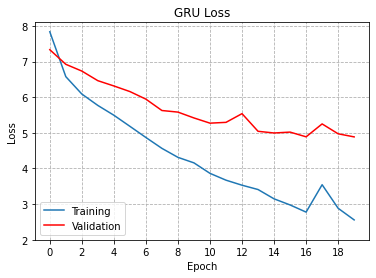

In [204]:
plt.plot(gru_loss.history['loss'])
plt.plot(gru_loss.history['val_loss'], 'r')

plt.title('GRU Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower left')

plt.yticks(range(2,9,1))
plt.xticks(range(0,20,2))
plt.grid(linestyle='--')

plt.savefig('plots/gru_loss.png')

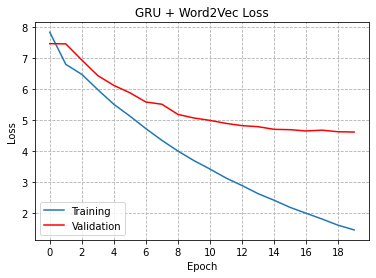

In [155]:
plt.plot(gru_w2v_loss.history['loss'])
plt.plot(gru_w2v_loss.history['val_loss'], 'r')

plt.title('GRU + Word2Vec Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower left')

plt.yticks(range(2,9,1))
plt.xticks(range(0,20,2))
plt.grid(linestyle='--')

plt.savefig('plots/gru_w2v_loss.png')

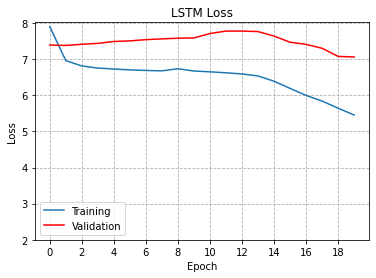

In [156]:
plt.plot(lstm_loss.history['loss'])
plt.plot(lstm_loss.history['val_loss'], 'r')

plt.title('LSTM Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower left')

plt.yticks(range(2,9,1))
plt.xticks(range(0,20,2))
plt.grid(linestyle='--')

plt.savefig('plots/lstm_loss.png')

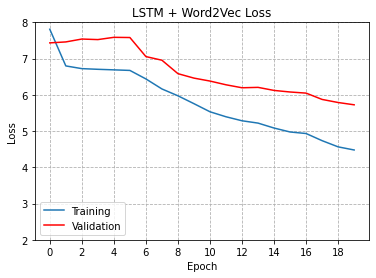

In [157]:
plt.plot(lstm_w2v_loss.history['loss'])
plt.plot(lstm_w2v_loss.history['val_loss'], 'r')

plt.title('LSTM + Word2Vec Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower left')

plt.yticks(range(2,9,1))
plt.xticks(range(0,20,2))
plt.grid(linestyle='--')

plt.savefig('plots/lstm_w2v_loss.png')

#### Train loss

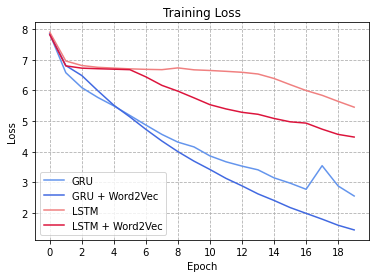

In [205]:
plt.plot(gru_loss.history['loss'], 'cornflowerblue')
plt.plot(gru_w2v_loss.history['loss'], 'royalblue')
plt.plot(lstm_loss.history['loss'], 'lightcoral')
plt.plot(lstm_w2v_loss.history['loss'], 'crimson')

plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['GRU', 'GRU + Word2Vec', 'LSTM', 'LSTM + Word2Vec'], loc='lower left')

plt.yticks(range(2,9,1))
plt.xticks(range(0,20,2))
plt.grid(linestyle='--')

plt.savefig('plots/train_loss.png')

#### Validation loss

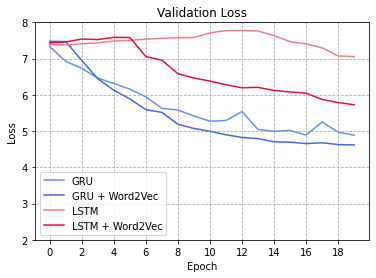

In [160]:
plt.plot(gru_loss.history['val_loss'], 'cornflowerblue')
plt.plot(gru_w2v_loss.history['val_loss'], 'royalblue')
plt.plot(lstm_loss.history['val_loss'], 'lightcoral')
plt.plot(lstm_w2v_loss.history['val_loss'], 'crimson')

plt.title('Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['GRU', 'GRU + Word2Vec', 'LSTM', 'LSTM + Word2Vec'], loc='lower left')

plt.yticks(range(2,9,1))
plt.xticks(range(0,20,2))
plt.grid(linestyle='--')

plt.savefig('plots/val_loss.png')

#### Perplexity

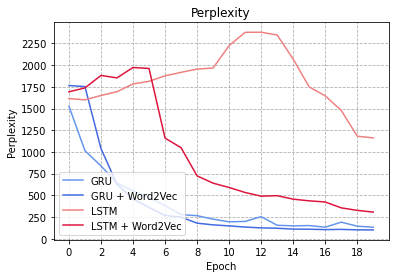

In [197]:
plt.plot(gru_perp, 'cornflowerblue')
plt.plot(gru_w2v_perp, 'royalblue')
plt.plot(lstm_perp, 'lightcoral')
plt.plot(lstm_w2v_perp, 'crimson')

plt.title('Perplexity')
plt.ylabel('Perplexity')
plt.xlabel('Epoch')
plt.legend(['GRU', 'GRU + Word2Vec', 'LSTM', 'LSTM + Word2Vec'], loc='lower left')

plt.yticks(range(0,2500,250))
plt.xticks(range(0,20,2))
plt.grid(linestyle='--')

plt.savefig('plots/perplexity.png')

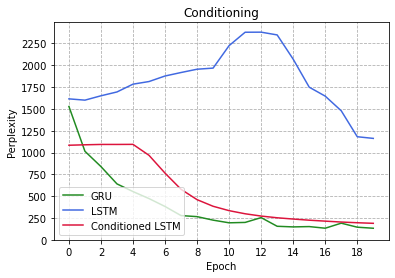

In [220]:
plt.plot(gru_perp, 'forestgreen')
plt.plot(lstm_perp, 'royalblue')
plt.plot(cond_lstm_perp, 'crimson')

plt.title('Conditioning')
plt.ylabel('Perplexity')
plt.xlabel('Epoch')
plt.legend(['GRU', 'LSTM', 'Conditioned LSTM'], loc='lower left')

plt.yticks(range(0,2500,250))
plt.xticks(range(0,20,2))
plt.grid(linestyle='--')

plt.savefig('plots/effect_conditioning.png')

In [ ]:
plt.plot(cond_lstm_perp, 'royalblue')
plt.plot(cond_lstm_w2v_perp, 'crimson')

plt.title('Conditioning')
plt.ylabel('Perplexity')
plt.xlabel('Epoch')
plt.legend(['GRU', 'LSTM', 'Conditioned LSTM'], loc='lower left')

plt.yticks(range(0,2500,250))
plt.xticks(range(0,20,2))
plt.grid(linestyle='--')

plt.savefig('plots/effect_conditioning.png')

## Generation

In [24]:
def word_to_id(word):
    return w2v_model.wv.key_to_index[word]

def id_to_word(id):
    return w2v_model.wv.index_to_key[id]

In [23]:
# using top k sampling
def sample(preds, top_k):
    
    top_ids = preds.argsort()[-top_k:][::-1]
    next_id = top_ids[random.sample(range(top_k),1)[0]]
    
    return next_id

In [25]:
def generate(model=gru, prompt='In this paper', n=20, top_k=10):
    
    word_ids = [word_to_id(word) for word in prompt.lower().split()]
    
    for i in range(n):
        prediction = model.predict(x=np.array(word_ids))
        id = sample(prediction[-1], top_k)
        word_ids.append(id)
        
    words = [id_to_word(w) for w in word_ids]
    
    return ' '.join(words)

In [49]:
generate()

'in this paper docre xie copula cmn cpg e correctthe docre xie copula docre docre rerun slovenia buffered correctthe accommodated de correctthe cpg'

In [54]:
generate(model=gru_w2v, n=20, top_k=30)

'in this paper backpropagation also anonymous including freeform ethical approach new new of and workload extracted minutes cubic also explore sql contributions cubic'

In [60]:
generate(model=lstm, prompt='here we propose', n=50, top_k=50)

'here we propose paper existing performance existing by are model based have we results word existing can level classification we task language our we on models are classification a experiments of two are models experiments of our paper words neural that approach of learning as level of based different be level as to'

In [63]:
generate(model=lstm_w2v, prompt='here we propose', n=50, top_k=50)

'here we propose abstraites cbt adam terrorists syntaxe dragon simplequestions in corpora datasets of a speech approach that pair datasets language an domain architecture on an then of corpora state and models on language data the how pair embeddings speech as screen first approach networks we machine machine architecture to with to experimental'

In [66]:
generate(model=lstm_w2v, prompt='In this paper we present a novel approach', n=20, top_k=50)

'in this paper we present a novel approach a task language multilingual language then that was as headache our on speech four networks an network our finally on'

## Evaluation

In [230]:
model_loss = {gru_loss: 'GRU', gru_w2v_loss: 'GRU + Word2Vec', lstm_loss: 'LSTM', lstm_w2v_loss: 'LSTM + Word2Vec'}

### Quantitative

In [231]:
# get minimimum validation loss within a set num of epochs
def min_val_loss(model, max_epochs=20):
    return min(model.history['val_loss'][:max_epochs])

In [232]:
for m in model_loss.keys():
    print("Minimum validation loss for {}: {:.5f}".format(model_loss[m], min_val_loss(m)))
    print("Perplexity for model {}: {:.2f}\n".format(model_loss[m], math.exp(min_val_loss(m))))

Minimum validation loss for GRU: 4.88585
Perplexity for model GRU: 132.40

Minimum validation loss for GRU + Word2Vec: 4.61792
Perplexity for model GRU + Word2Vec: 101.28

Minimum validation loss for LSTM: 7.05773
Perplexity for model LSTM: 1161.81

Minimum validation loss for LSTM + Word2Vec: 5.72500
Perplexity for model LSTM + Word2Vec: 306.43



### Qualitative

In [283]:
models  = {gru: 'GRU', gru_w2v: 'GRU + Word2Vec', lstm: 'LSTM', lstm_w2v: 'LSTM + Word2Vec'}
prompts = ['in', 'in this paper', 'in this paper we present', 'in this paper we present a novel approach to']
n_list  = [5, 10, 20, 50]
k_list  = [2, 5, 10, 20]

In [289]:
counter = 0

for m in models.keys():
    for p in prompts:
        for n in n_list:
            for k in k_list:
                counter += 1
                print("=" * 180 + "\n[{}] MODEL: {}  |  PROMPT: '{}'  |  WORDS: {}  |  TOP {}".format(counter, models[m], p, n, k))
                print("=" * 180 + "\n\n {}\n" .format(generate(model=m, prompt=p, n=n, top_k=k)))

[1] MODEL: GRU  |  PROMPT: 'in'  |  WORDS: 5  |  TOP 2

 in in docre correctthe docre correctthe

[2] MODEL: GRU  |  PROMPT: 'in'  |  WORDS: 5  |  TOP 5

 in selective de cpg versions e

[3] MODEL: GRU  |  PROMPT: 'in'  |  WORDS: 5  |  TOP 10

 in correctthe monosemous de decentralised property

[4] MODEL: GRU  |  PROMPT: 'in'  |  WORDS: 5  |  TOP 20

 in salesman property cmn accommodated amortised

[5] MODEL: GRU  |  PROMPT: 'in'  |  WORDS: 10  |  TOP 2

 in docre docre docre correctthe monosemous de docre docre correctthe monosemous

[6] MODEL: GRU  |  PROMPT: 'in'  |  WORDS: 10  |  TOP 5

 in selective selective correctthe monosemous le accommodated de cpg de slovenia

[7] MODEL: GRU  |  PROMPT: 'in'  |  WORDS: 10  |  TOP 10

 in correctthe slovenia copula cmn wtq de docre decentralised cmn cpg

[8] MODEL: GRU  |  PROMPT: 'in'  |  WORDS: 10  |  TOP 20

 in correctthe sanity fran separately de xie worries europeanization rerun trap

[9] MODEL: GRU  |  PROMPT: 'in'  |  WORDS: 20  |  